In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
spx_prices = pd.read_csv('spx.csv', index_col=0, parse_dates=True)

In [3]:
spx_prices

,SPX
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75
...,...
2011-10-10,1194.89
2011-10-11,1195.54
2011-10-12,1207.25
2011-10-13,1203.66


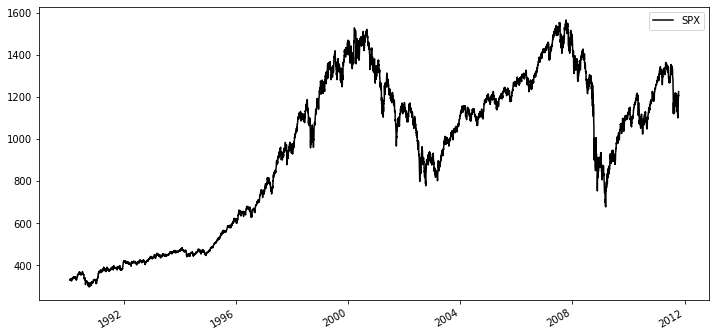

In [4]:
%matplotlib inline
spx_prices.plot(figsize=(12,6), color='black')

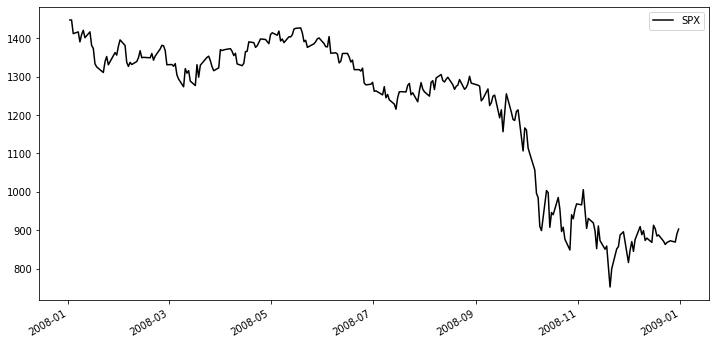

In [5]:
spx_prices.loc['2008'].plot(figsize=(12,6), color='black')

In [6]:
spx_prices['SPX_MA'] = spx_prices['SPX'].rolling(40).mean()
spx_prices.fillna(method='backfill', inplace=True)

In [7]:
spx_prices

,SPX,SPX_MA
1990-02-01,328.79,334.62225
1990-02-02,330.92,334.62225
1990-02-05,331.85,334.62225
1990-02-06,329.66,334.62225
1990-02-07,333.75,334.62225
...,...,...
2011-10-10,1194.89,1170.77600
2011-10-11,1195.54,1170.55225
2011-10-12,1207.25,1170.91450
2011-10-13,1203.66,1171.15875


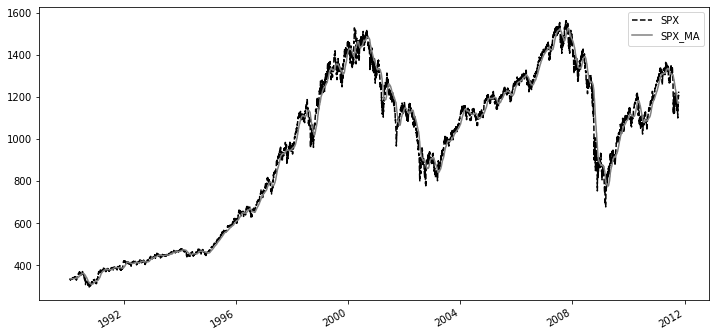

In [8]:
spx_prices['SPX'].plot(figsize=(12,6), linestyle='--', color='black', legend='SPX')
spx_prices['SPX_MA'].plot(figsize=(12,6), linestyle='-', color='grey', legend='SPX_MA')

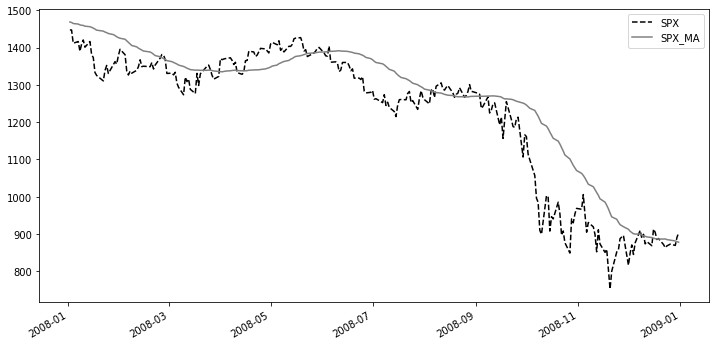

In [9]:
spx_prices['SPX']['2008'].plot(figsize=(12,6), linestyle='--', color='black', legend='SPX')
spx_prices['SPX_MA']['2008'].plot(figsize=(12,6), linestyle='-', color='grey', legend='SPX_MA')

In [10]:
spx_prices['SPX_STDDEV'] = spx_prices['SPX'].rolling(40).std()

In [11]:
spx_prices.fillna(method='backfill', inplace=True)

In [12]:
spx_prices

,SPX,SPX_MA,SPX_STDDEV
1990-02-01,328.79,334.62225,4.897452
1990-02-02,330.92,334.62225,4.897452
1990-02-05,331.85,334.62225,4.897452
1990-02-06,329.66,334.62225,4.897452
1990-02-07,333.75,334.62225,4.897452
...,...,...,...
2011-10-10,1194.89,1170.77600,30.286523
2011-10-11,1195.54,1170.55225,30.063303
2011-10-12,1207.25,1170.91450,30.422907
2011-10-13,1203.66,1171.15875,30.650463


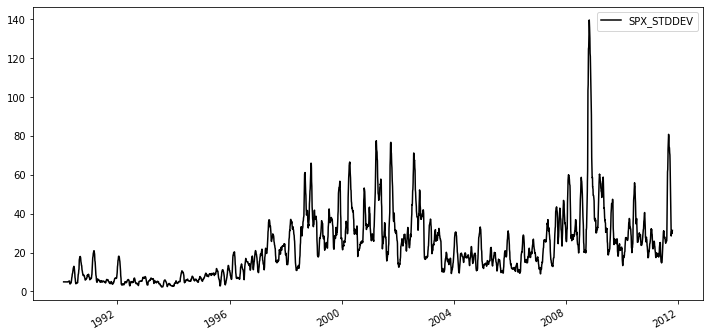

In [13]:
spx_prices['SPX_STDDEV'].plot(figsize=(12,6), linestyle='-', color='black', legend='SPX_STDDEV')

In [14]:
spx_prices['SPX_UPPER_BAND'] = spx_prices['SPX_MA'] + 2 * spx_prices['SPX_STDDEV']
spx_prices['SPX_LOWER_BAND'] = spx_prices['SPX_MA'] - 2 * spx_prices['SPX_STDDEV']

spx_prices

,SPX,SPX_MA,SPX_STDDEV,SPX_UPPER_BAND,SPX_LOWER_BAND
1990-02-01,328.79,334.62225,4.897452,344.417154,324.827346
1990-02-02,330.92,334.62225,4.897452,344.417154,324.827346
1990-02-05,331.85,334.62225,4.897452,344.417154,324.827346
1990-02-06,329.66,334.62225,4.897452,344.417154,324.827346
1990-02-07,333.75,334.62225,4.897452,344.417154,324.827346
...,...,...,...,...,...
2011-10-10,1194.89,1170.77600,30.286523,1231.349046,1110.202954
2011-10-11,1195.54,1170.55225,30.063303,1230.678856,1110.425644
2011-10-12,1207.25,1170.91450,30.422907,1231.760313,1110.068687
2011-10-13,1203.66,1171.15875,30.650463,1232.459676,1109.857824


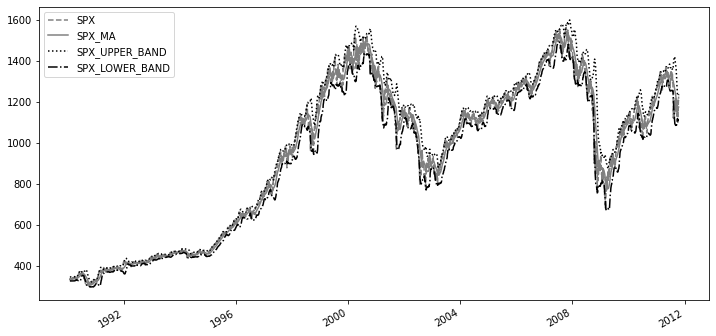

In [15]:
spx_prices['SPX'].plot(figsize=(12,6), linestyle='--', color='grey', legend='SPX')
spx_prices['SPX_MA'].plot(figsize=(12,6), linestyle='-', color='grey', legend='SPX_MA')
spx_prices['SPX_UPPER_BAND'].plot(figsize=(12,6), linestyle=':', color='black', legend='SPX_UPPER_BAND')
spx_prices['SPX_LOWER_BAND'].plot(figsize=(12,6), linestyle='-.', color='black', legend='SPX_LOWER_BAND')

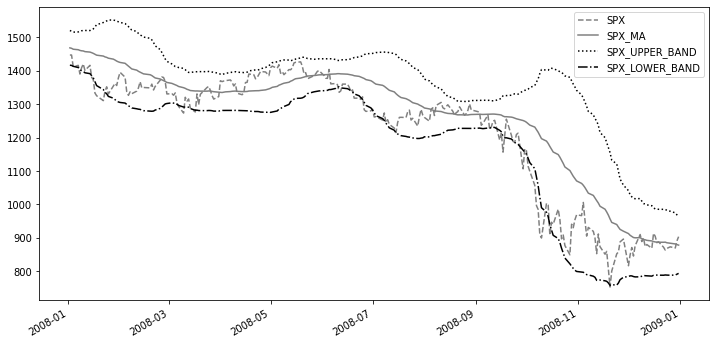

In [16]:
spx_prices['SPX']['2008'].plot(figsize=(12,6), linestyle='--', color='grey', legend='SPX')
spx_prices['SPX_MA']['2008'].plot(figsize=(12,6), linestyle='-', color='grey', legend='SPX_MA')
spx_prices['SPX_UPPER_BAND']['2008'].plot(figsize=(12,6), linestyle=':', color='black', legend='SPX_UPPER_BAND')
spx_prices['SPX_LOWER_BAND']['2008'].plot(figsize=(12,6), linestyle='-.', color='black', legend='SPX_LOWER_BAND')

In [40]:
spx_prices['BUYS'] = spx_prices['SPX'] < spx_prices['SPX_LOWER_BAND']
spx_prices['SELLS'] = spx_prices['SPX'] > spx_prices['SPX_UPPER_BAND']

In [59]:
spx_prices[['SPX', 'SPX_UPPER_BAND', 'SPX_LOWER_BAND', 'BUYS', 'SELLS']][(spx_prices['BUYS'] | spx_prices['SELLS'])]

,SPX,SPX_UPPER_BAND,SPX_LOWER_BAND,BUYS,SELLS
1990-02-23,324.15,344.417154,324.827346,True,False
1990-04-24,330.36,346.520492,330.833508,True,False
1990-04-27,329.11,346.608043,330.704457,True,False
1990-05-11,352.00,348.897339,329.452161,False,True
1990-05-14,354.75,350.368630,328.622870,False,True
...,...,...,...,...,...
2011-08-08,1119.46,1386.185150,1204.113850,True,False
2011-08-09,1172.53,1391.401690,1193.932310,True,False
2011-08-10,1120.76,1401.208150,1175.770350,True,False
2011-08-19,1123.53,1416.116075,1123.746925,True,False


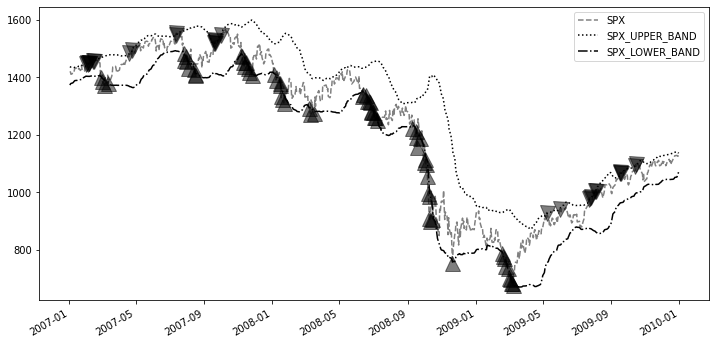

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)

spx_prices_2007_2009 = spx_prices['2007':'2009']
spx_prices_2007_2009['SPX'].plot(ax=ax, figsize=(12,6), linestyle='--', color='grey', legend='SPX')
spx_prices_2007_2009['SPX_UPPER_BAND'].plot(ax=ax, figsize=(12,6), linestyle=':', color='black', legend='SPX_UPPER_BAND')
spx_prices_2007_2009['SPX_LOWER_BAND'].plot(ax=ax, figsize=(12,6), linestyle='-.', color='black', legend='SPX_LOWER_BAND')
ax.plot(spx_prices_2007_2009.loc[spx_prices_2007_2009['BUYS']].index, spx_prices_2007_2009['SPX'][spx_prices_2007_2009['BUYS']], '^', color='black', markersize=15, alpha=0.5)
ax.plot(spx_prices_2007_2009.loc[spx_prices_2007_2009['SELLS']].index, spx_prices_2007_2009['SPX'][spx_prices_2007_2009['SELLS']], 'v', color='black', markersize=15, alpha=0.5)